In [1]:
#!pip install imblearn

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from category_encoders import OneHotEncoder
from imblearn.over_sampling import RandomOverSampler
from sklearn.impute import SimpleImputer
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree


In [3]:
df=pd.read_csv('SA_Aqar.csv')
df.head()

,city,front,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,driver_room,...,ac,roof,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price
0,RIYADH,north,250.0,0.0,5.0,5.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,"80,000"
1,RIYADH,south,370.0,0.0,4.0,5.0,2.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,"60,000"
2,RIYADH,south,380.0,0.0,4.0,5.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,"60,000"
3,RIYADH,west,250.0,0.0,5.0,5.0,3.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,"55,000"
4,RIYADH,west,400.0,11.0,7.0,5.0,2.0,1.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,"70,000"


In [4]:
df.shape

(3719, 22)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3719 entries, 0 to 3718
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   city          3718 non-null   object 
 1   front         3718 non-null   object 
 2   size          3718 non-null   float64
 3   property_age  3718 non-null   float64
 4   bedrooms      3718 non-null   float64
 5   bathrooms     3718 non-null   float64
 6   livingrooms   3718 non-null   float64
 7   kitchen       3718 non-null   float64
 8   garage        3718 non-null   float64
 9   driver_room   3718 non-null   float64
 10  maid_room     3718 non-null   float64
 11  furnished     3718 non-null   float64
 12  ac            3718 non-null   float64
 13  roof          3718 non-null   float64
 14  pool          3718 non-null   float64
 15  frontyard     3718 non-null   float64
 16  basement      3718 non-null   float64
 17  duplex        3718 non-null   float64
 18  stairs        3718 non-null 

In [6]:
df['city'].value_counts()

 KHOBAR    976
 RIYADH    960
 DAMMAM    894
 JEDDAH    888
Name: city, dtype: int64

In [7]:
df['front'].value_counts()

north         917
east          776
west          771
south         739
north east    147
south east    141
south west    112
north west     83
3 شوارع        23
4 شوارع         9
Name: front, dtype: int64

<AxesSubplot:title={'center':'City Class Balance'}, xlabel='class', ylabel='Relative Frequency'>

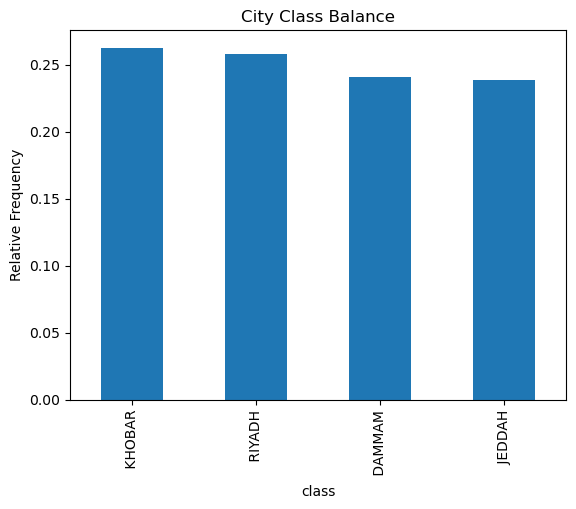

In [8]:
# Plot value counts of `"city"`
df["city"].value_counts(normalize=True).plot(
kind="bar", xlabel="class", ylabel="Relative Frequency",title="City Class Balance")


<AxesSubplot:title={'center':'Front Class Balance'}, xlabel='class', ylabel='Relative Frequency'>

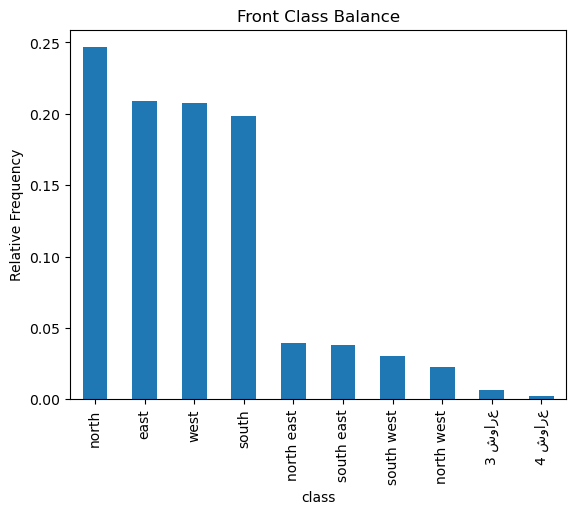

In [9]:
# Plot value counts of `"front"`
df["front"].value_counts(normalize=True).plot(
kind="bar", xlabel="class", ylabel="Relative Frequency",title="Front Class Balance")


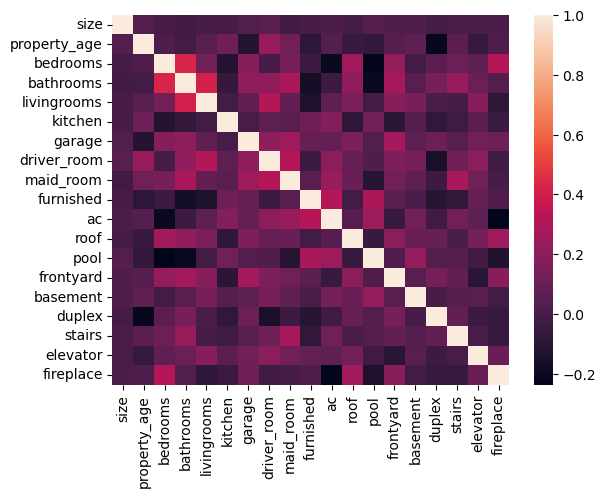

In [10]:
# Create correlation matrix
correlation = df.select_dtypes("number").corr()
correlation
# Plot heatmap of `correlation`
sns.heatmap(correlation);

In [11]:
correlation

,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,driver_room,maid_room,furnished,ac,roof,pool,frontyard,basement,duplex,stairs,elevator,fireplace
size,1.000000,0.026605,-0.001659,-0.020684,-0.003165,-0.002841,0.026136,0.050188,-0.019671,0.000228,0.014276,-0.005264,0.037103,0.024471,0.019690,-0.010833,0.009946,0.004103,0.014135
property_age,0.026605,1.000000,0.019242,-0.015376,0.045143,0.113298,-0.115827,0.229479,0.123351,-0.086590,0.037264,-0.051128,-0.067364,0.040116,0.065122,-0.212236,0.059045,-0.061000,0.017599
bedrooms,-0.001659,0.019242,1.000000,0.428383,0.117873,-0.117855,0.180438,-0.001162,0.136515,-0.035578,-0.200039,0.260171,-0.233998,0.226132,-0.018852,0.059557,0.105136,0.068742,0.309624
bathrooms,-0.020684,-0.015376,0.428383,1.000000,0.407682,-0.064741,0.207669,0.212013,0.281067,-0.170169,-0.042818,0.208967,-0.201461,0.264357,0.048366,0.145092,0.229664,0.102957,0.025026
livingrooms,-0.003165,0.045143,0.117873,0.407682,1.000000,-0.017165,0.073331,0.308451,0.081950,-0.135604,0.067642,0.149828,-0.015394,0.179971,0.143856,0.004689,-0.012590,0.182475,-0.081845
kitchen,-0.002841,0.113298,-0.117855,-0.064741,-0.017165,1.000000,0.003030,0.063800,0.053458,0.112787,0.175524,-0.082984,0.121265,-0.095389,0.038742,-0.072476,-0.030222,0.059358,-0.045981
garage,0.026136,-0.115827,0.180438,0.207669,0.073331,0.003030,1.000000,0.204983,0.249873,0.092054,0.085330,0.156525,0.026654,0.262338,0.067415,0.104766,0.049328,0.125179,0.109371
driver_room,0.050188,0.229479,-0.001162,0.212013,0.308451,0.063800,0.204983,1.000000,0.314959,-0.038470,0.195619,0.091367,0.021291,0.159256,0.139336,-0.151171,0.110739,0.192867,-0.028066
maid_room,-0.019671,0.123351,0.136515,0.281067,0.081950,0.053458,0.249873,0.314959,1.000000,0.046504,0.233394,0.098584,-0.109109,0.121861,0.069712,-0.042543,0.272245,0.121239,-0.007001
furnished,0.000228,-0.086590,-0.035578,-0.170169,-0.135604,0.112787,0.092054,-0.038470,0.046504,1.000000,0.314005,-0.018620,0.284684,0.058777,0.005948,-0.106705,-0.073224,0.086449,0.020782


In [12]:
# Check for high- and low-cardinality categorical features
df.select_dtypes("object").nunique()

city       4
front     10
price    123
dtype: int64

In [13]:
#check missing prices
df['price'].isna().sum()

1

In [14]:
#drop missing entry
df.dropna(subset = ['price'], inplace=True)
df.shape

(3718, 22)

In [15]:
#convert price to float
df['price'] = df['price'].replace(',','', regex=True)

df['price']=df['price'].astype('float')
df['price']

0       80000.0
1       60000.0
2       60000.0
3       55000.0
4       70000.0
         ...   
3713    60000.0
3714    55000.0
3715    37000.0
3716    90000.0
3717    60000.0
Name: price, Length: 3718, dtype: float64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3718 entries, 0 to 3717
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   city          3718 non-null   object 
 1   front         3718 non-null   object 
 2   size          3718 non-null   float64
 3   property_age  3718 non-null   float64
 4   bedrooms      3718 non-null   float64
 5   bathrooms     3718 non-null   float64
 6   livingrooms   3718 non-null   float64
 7   kitchen       3718 non-null   float64
 8   garage        3718 non-null   float64
 9   driver_room   3718 non-null   float64
 10  maid_room     3718 non-null   float64
 11  furnished     3718 non-null   float64
 12  ac            3718 non-null   float64
 13  roof          3718 non-null   float64
 14  pool          3718 non-null   float64
 15  frontyard     3718 non-null   float64
 16  basement      3718 non-null   float64
 17  duplex        3718 non-null   float64
 18  stairs        3718 non-null 

In [17]:
#convert categorical values into dummies
df = pd.get_dummies(df, columns = ['city', 'front'])
df


,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,driver_room,maid_room,furnished,...,front_3 شوارع,front_4 شوارع,front_east,front_north,front_north east,front_north west,front_south,front_south east,front_south west,front_west
0,250.0,0.0,5.0,5.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0,0,0,1,0,0,0,0,0,0
1,370.0,0.0,4.0,5.0,2.0,1.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
2,380.0,0.0,4.0,5.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0,0,0,0,0,0,1,0,0,0
3,250.0,0.0,5.0,5.0,3.0,0.0,1.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,400.0,11.0,7.0,5.0,2.0,1.0,1.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3713,437.0,0.0,7.0,5.0,2.0,1.0,1.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3714,400.0,0.0,5.0,5.0,3.0,0.0,1.0,0.0,1.0,0.0,...,0,0,0,0,0,0,1,0,0,0
3715,330.0,0.0,6.0,4.0,2.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3716,300.0,13.0,6.0,5.0,2.0,1.0,1.0,1.0,1.0,0.0,...,0,0,0,0,0,0,1,0,0,0


In [18]:
target = "price"
X = df.drop(columns=target)
y = df[target]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (3718, 33)
y shape: (3718,)


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (2974, 33)
y_train shape: (2974,)
X_test shape: (744, 33)
y_test shape: (744,)


In [20]:
over_sampler =RandomOverSampler(random_state=42)
X_train_over, y_train_over = over_sampler.fit_resample(X_train,y_train)
print("X_train_over shape:", X_train_over.shape)
X_train_over.head()

X_train_over shape: (27300, 33)


,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,driver_room,maid_room,furnished,...,front_3 شوارع,front_4 شوارع,front_east,front_north,front_north east,front_north west,front_south,front_south east,front_south west,front_west
0,360.0,5.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,0.0,...,0,0,0,1,0,0,0,0,0,0
1,350.0,10.0,5.0,5.0,5.0,1.0,1.0,1.0,1.0,0.0,...,0,0,0,0,0,0,1,0,0,0
2,600.0,9.0,7.0,5.0,2.0,1.0,1.0,1.0,1.0,1.0,...,0,0,1,0,0,0,0,0,0,0
3,375.0,0.0,4.0,4.0,2.0,1.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,250.0,5.0,6.0,5.0,3.0,1.0,1.0,1.0,1.0,0.0,...,0,0,0,1,0,0,0,0,0,0


In [21]:
clf = make_pipeline(SimpleImputer(),RandomForestClassifier(random_state=42))
print(clf)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])


In [22]:
cv_acc_scores = cross_val_score(clf,X_train_over,y_train_over,cv=5,n_jobs=-1)
print(cv_acc_scores)

[0.98571429 0.97838828 0.98736264 0.99249084 0.9959707 ]


In [23]:
params = {
    "simpleimputer__strategy":['mean','median'],
    "randomforestclassifier__n_estimators": range(25,100,25),
    "randomforestclassifier__max_depth": range(10,50,10)
}
params

{'simpleimputer__strategy': ['mean', 'median'],
 'randomforestclassifier__n_estimators': range(25, 100, 25),
 'randomforestclassifier__max_depth': range(10, 50, 10)}

In [24]:
model = GridSearchCV(
    clf,
param_grid=params,
cv=5,
n_jobs=-1,
verbose=1)
model

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 50, 10),
                         'randomforestclassifier__n_estimators': range(25, 100, 25),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

In [25]:
# Train model
model.fit(X_train_over,y_train_over)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 50, 10),
                         'randomforestclassifier__n_estimators': range(25, 100, 25),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

In [26]:
model.cv_results_

{'mean_fit_time': array([0.50604725, 0.59121966, 0.81980987, 0.93190818, 1.17844949,
        1.12519259, 0.63151259, 0.63968983, 1.07951322, 1.13776584,
        1.52412677, 1.64460435, 0.61695056, 0.67399712, 1.22851615,
        2.05031872, 2.38482485, 1.65477853, 0.56090174, 0.75278645,
        1.45530901, 1.84885736, 2.52245574, 2.45204406]),
 'std_fit_time': array([0.14642431, 0.11276783, 0.02750876, 0.07453696, 0.04540541,
        0.04852176, 0.04839817, 0.03087307, 0.05652875, 0.05291146,
        0.04389787, 0.05148068, 0.06484862, 0.03411536, 0.11910182,
        0.0825335 , 0.20726323, 0.03296436, 0.04252473, 0.0421089 ,
        0.15291   , 0.0713592 , 0.07653529, 0.10552682]),
 'mean_score_time': array([0.22300444, 0.18171411, 0.40591421, 0.38736663, 0.61635332,
        0.55711012, 0.16037068, 0.14600959, 0.34248643, 0.29141288,
        0.59141908, 0.50684509, 0.15977244, 0.15797853, 0.39614172,
        0.42107487, 0.48729644, 0.54773383, 0.16795011, 0.15817685,
        0.413892

In [27]:
cv_results = pd.DataFrame(model.cv_results_)
cv_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestclassifier__max_depth,param_randomforestclassifier__n_estimators,param_simpleimputer__strategy,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.506047,0.146424,0.223004,0.076090,10,25,mean,"{'randomforestclassifier__max_depth': 10, 'ran...",0.928755,0.916117,0.919597,0.924725,0.914835,0.920806,0.005247,23
1,0.591220,0.112768,0.181714,0.016490,10,25,median,"{'randomforestclassifier__max_depth': 10, 'ran...",0.928755,0.916117,0.919597,0.924725,0.914835,0.920806,0.005247,23
2,0.819810,0.027509,0.405914,0.064429,10,50,mean,"{'randomforestclassifier__max_depth': 10, 'ran...",0.931685,0.928022,0.935897,0.936813,0.933150,0.933114,0.003143,21
3,0.931908,0.074537,0.387367,0.048699,10,50,median,"{'randomforestclassifier__max_depth': 10, 'ran...",0.931685,0.928022,0.935897,0.936813,0.933150,0.933114,0.003143,21
4,1.178449,0.045405,0.616353,0.062678,10,75,mean,"{'randomforestclassifier__max_depth': 10, 'ran...",0.937729,0.928022,0.940659,0.939194,0.936630,0.936447,0.004426,19
5,1.125193,0.048522,0.557110,0.058922,10,75,median,"{'randomforestclassifier__max_depth': 10, 'ran...",0.937729,0.928022,0.940659,0.939194,0.936630,0.936447,0.004426,19
6,0.631513,0.048398,0.160371,0.024029,20,25,mean,"{'randomforestclassifier__max_depth': 20, 'ran...",0.985714,0.977839,0.987729,0.993040,0.995788,0.988022,0.006239,13
7,0.639690,0.030873,0.146010,0.017003,20,25,median,"{'randomforestclassifier__max_depth': 20, 'ran...",0.985714,0.977839,0.987729,0.993040,0.995788,0.988022,0.006239,13
8,1.079513,0.056529,0.342486,0.036227,20,50,mean,"{'randomforestclassifier__max_depth': 20, 'ran...",0.985897,0.977839,0.987729,0.992857,0.994872,0.987839,0.005974,17
9,1.137766,0.052911,0.291413,0.018461,20,50,median,"{'randomforestclassifier__max_depth': 20, 'ran...",0.985897,0.977839,0.987729,0.992857,0.994872,0.987839,0.005974,17


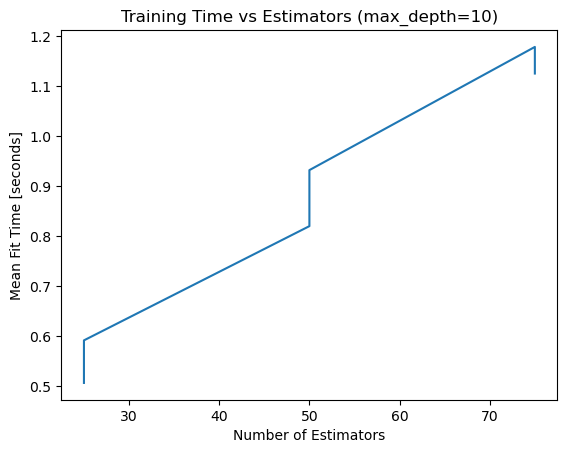

In [28]:
# Create mask
mask = cv_results["param_randomforestclassifier__max_depth"]==10
# Plot fit time vs n_estimators
plt.plot(
cv_results[mask]["param_randomforestclassifier__n_estimators"],cv_results[mask]["mean_fit_time"])
# Label axes
plt.xlabel("Number of Estimators")
plt.ylabel("Mean Fit Time [seconds]")
plt.title("Training Time vs Estimators (max_depth=10)");

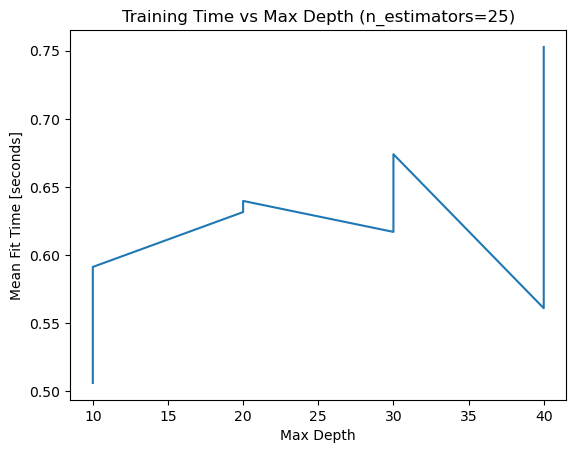

In [29]:
# Create mask
mask = cv_results["param_randomforestclassifier__n_estimators"]==25
# Plot fit time vs max_depth
plt.plot(
cv_results[mask]["param_randomforestclassifier__max_depth"],cv_results[mask]["mean_fit_time"])
# Label axes
plt.xlabel("Max Depth")
plt.ylabel("Mean Fit Time [seconds]")
plt.title("Training Time vs Max Depth (n_estimators=25)");

In [30]:
# Extract best hyperparameters
model.best_params_
model.predict(X_train_over)

array([ 120000.,  150000.,   85000., ..., 1700000., 1700000., 1700000.])

In [31]:
acc_train = model.score(X_train,y_train)
acc_test = model.score(X_test,y_test)

print("Training Accuracy:", round(acc_train, 4))
print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 0.9987
Test Accuracy: 0.6277


In [32]:
y_test.value_counts()

80000.0     68
60000.0     51
100000.0    42
70000.0     37
65000.0     34
            ..
550000.0     1
83000.0      1
300000.0     1
53000.0      1
1100.0       1
Name: price, Length: 67, dtype: int64

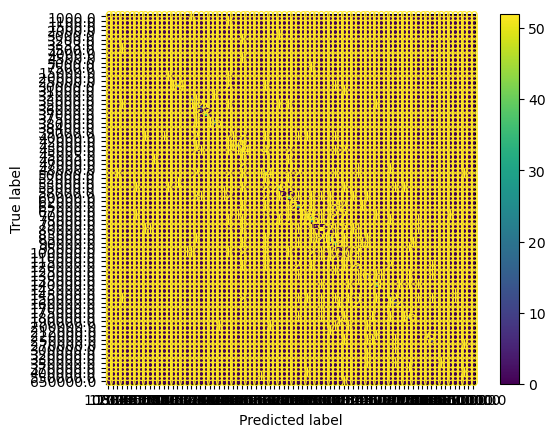

In [33]:
# Plot confusion matri
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test)

In [34]:
# y_pred=model.predict(X_test)

# print(classification_report(y_test,y_pred))


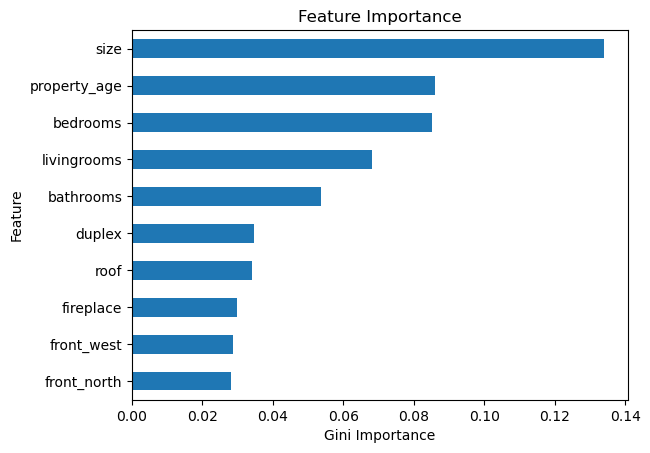

In [35]:
# Get feature names from training data
features = X_train_over.columns
# Extract importances from model
importances = model.best_estimator_.named_steps["randomforestclassifier"].feature_importances_
# Create a series with feature names and importances
feat_imp = pd.Series(importances,index=features).sort_values()
# Plot 10 most important features
feat_imp.tail(10).plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");